In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Train_set')
df.head

<bound method NDFrame.head of       Unnamed: 0                                              tweet label
0              0  The CDC currently reports 99031 deaths. In gen...  real
1              1  States reported 1121 deaths a small rise from ...  real
2              2  Politically Correct Woman (Almost) Uses Pandem...  fake
3              3  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4              4  Populous states can generate large case counts...  real
...          ...                                                ...   ...
6415        6415  A tiger tested positive for COVID-19 please st...  fake
6416        6416  ???Autopsies prove that COVID-19 is??� a blood...  fake
6417        6417  _A post claims a COVID-19 vaccine has already ...  fake
6418        6418  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund  fake
6419        6419  It has been 93 days since the last case of COV...  real

[6420 rows x 3 columns]>

In [3]:
df.drop('Unnamed: 0', inplace = True, axis = 1)

In [4]:
df.loc[df["label"] == "real", "label"] = 1
df.loc[df["label"] == "fake", "label"] = 0

In [5]:
df.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,1
1,States reported 1121 deaths a small rise from ...,1
2,Politically Correct Woman (Almost) Uses Pandem...,0
3,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,Populous states can generate large case counts...,1


In [6]:
# df.isnull().sum()

In [7]:
# import nltk

In [8]:
# nltk.download_shell()

In [9]:
# df.describe()

In [10]:
# df.shape

In [11]:
# df['label'].value_counts()

In [12]:
# df.info()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import string
from nltk.corpus import stopwords

In [15]:
def text_process(message):
    """
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean words
    """
    
    nopunc = [char for char in message if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [16]:
def listToString(s):

    string = ' '.join(s)

    return string

In [17]:
df['tweet'] = df['tweet'].apply(text_process)
df['tweet'] = df['tweet'].apply(listToString)

In [18]:
df['length'] = df['tweet'].apply(len)
df.head()

,tweet,label,length
0,cdc currently reports 99031 deaths general dis...,1,150
1,states reported 1121 deaths small rise last tu...,1,106
2,politically correct woman almost uses pandemic...,0,112
3,indiafightscorona 1524 covid testing laborator...,1,159
4,populous states generate large case counts loo...,1,181


(0.0, 600.0)

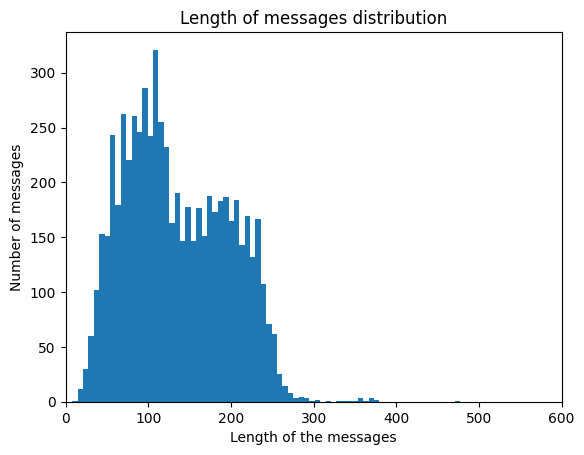

In [19]:
#To find the range of length of words
plt.xlabel("Length of the messages")
plt.ylabel("Number of messages")
plt.title("Length of messages distribution")
plt.hist(x = df['length'],bins = 1000)
plt.xlim(0,600)

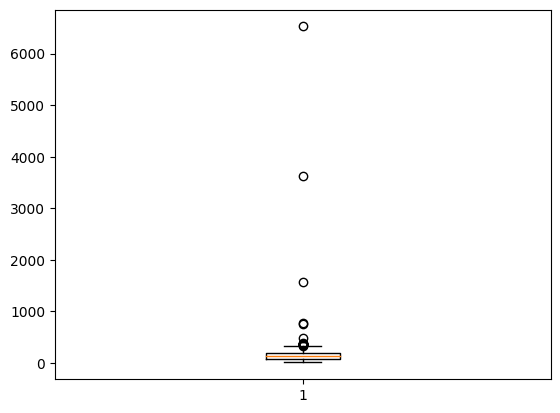

<Figure size 1000x700 with 0 Axes>

In [21]:
plt.boxplot(df['length'])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [22]:
max_length = 350
df = df[df['length'] <= max_length]
print(df)

                                                  tweet label  length
0     cdc currently reports 99031 deaths general dis...     1     150
1     states reported 1121 deaths small rise last tu...     1     106
2     politically correct woman almost uses pandemic...     0     112
3     indiafightscorona 1524 covid testing laborator...     1     159
4     populous states generate large case counts loo...     1     181
...                                                 ...   ...     ...
6415  tiger tested positive covid19 please stay away...     0      57
6416  autopsies prove covid19 is� blood clot pneumon...     0     120
6417  post claims covid19 vaccine already developed ...     0      74
6418      aamir khan donate 250 cr pm relief cares fund     0      45
6419  93 days since last case covid19 acquired local...     1     154

[6405 rows x 3 columns]


In [23]:
y = df['label']
y=y.astype('int')

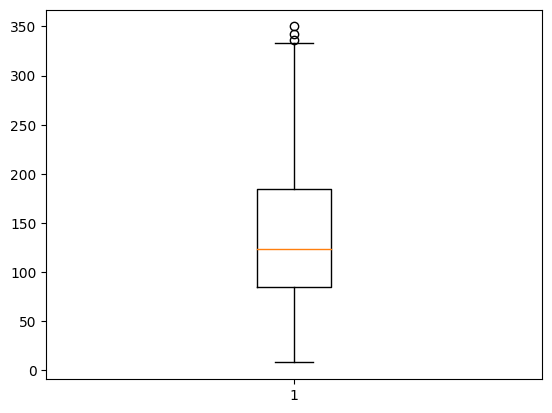

<Figure size 1000x700 with 0 Axes>

In [24]:
plt.boxplot(df['length'])
fig = plt.figure(figsize =(10, 7))
plt.show()

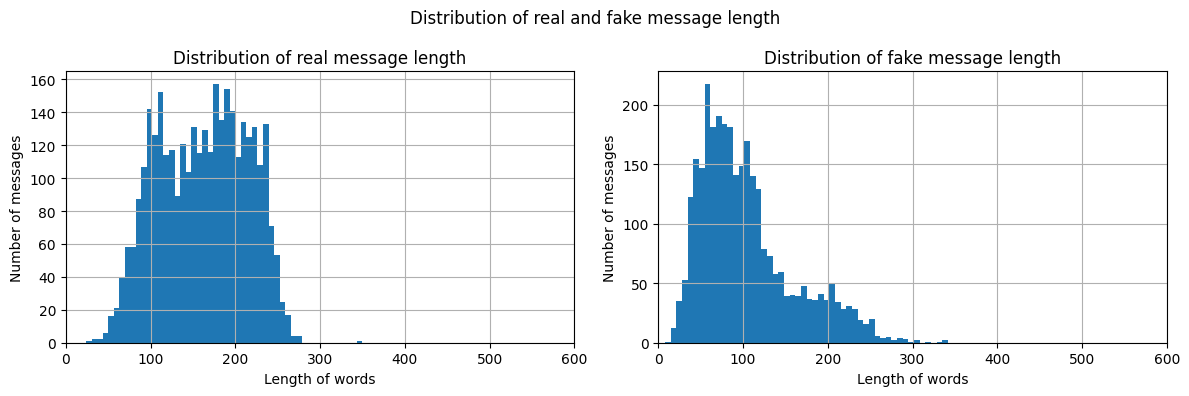

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df[df['label'] == 1].hist(column='length', bins=50, ax=axes[0])
axes[0].set_title('Distribution of real message length')
axes[0].set_xlabel('Length of words')
axes[0].set_ylabel('Number of messages')
axes[0].set_xlim(0, 600)

df[df['label'] == 0].hist(column='length', bins=50, ax=axes[1])
axes[1].set_title('Distribution of fake message length')
axes[1].set_xlabel('Length of words')
axes[1].set_ylabel('Number of messages')
axes[1].set_xlim(0, 600)

plt.suptitle("Distribution of real and fake message length")

plt.tight_layout()
plt.show()

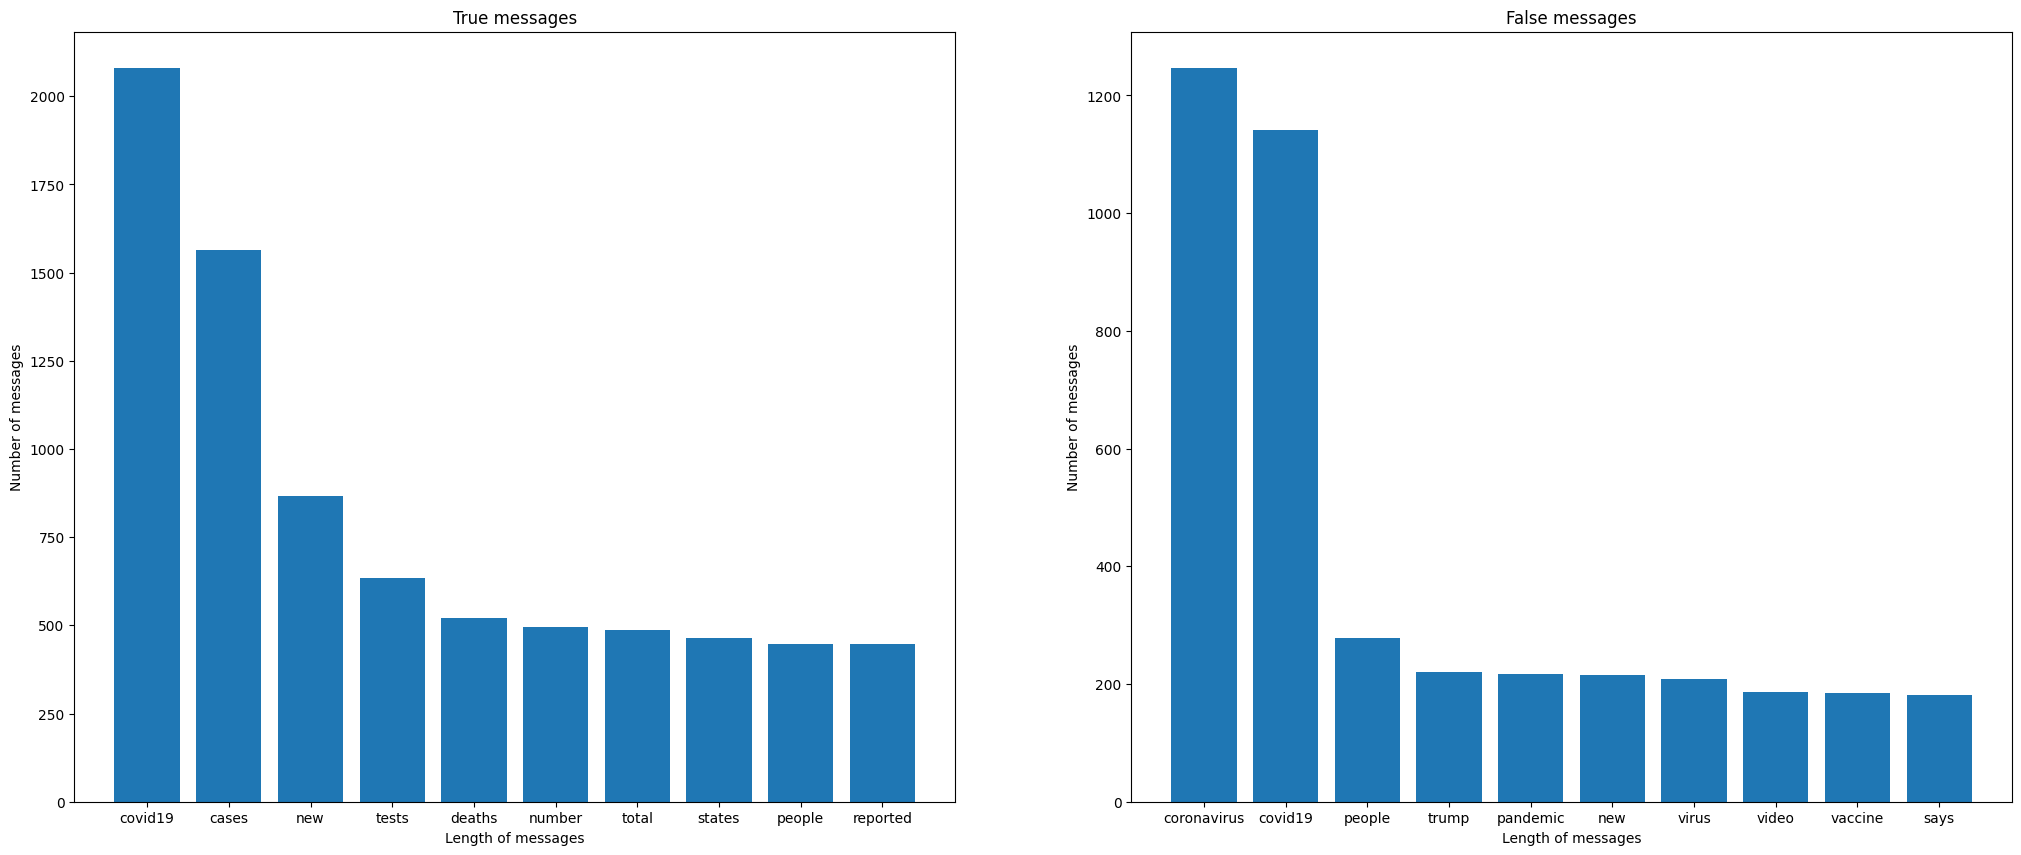

In [26]:
from collections import Counter
import matplotlib.pyplot as plt

# Separate the messages by their true/false label
true_messages = df[df['label'] == 1]['tweet']
false_messages = df[df['label'] == 0]['tweet']

# Count the frequency of words in the true messages
true_word_counts = Counter(" ".join(true_messages).split())

# Count the frequency of words in the false messages
false_word_counts = Counter(" ".join(false_messages).split())

# Extract the top N most frequent words from each class
N = 10
true_top_words = [word[0] for word in true_word_counts.most_common(N)]
false_top_words = [word[0] for word in false_word_counts.most_common(N)]

# Plot the word frequency distribution for each class
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10))
ax1.bar(true_top_words, [true_word_counts[word] for word in true_top_words])
ax1.set_title('True messages')
ax1.set_xlabel('Length of messages')
ax1.set_ylabel('Number of messages')
ax2.bar(false_top_words, [false_word_counts[word] for word in false_top_words])
ax2.set_title('False messages')
ax2.set_xlabel('Length of messages')
ax2.set_ylabel('Number of messages')
plt.show()

In [27]:
df.head()

,tweet,label,length
0,cdc currently reports 99031 deaths general dis...,1,150
1,states reported 1121 deaths small rise last tu...,1,106
2,politically correct woman almost uses pandemic...,0,112
3,indiafightscorona 1524 covid testing laborator...,1,159
4,populous states generate large case counts loo...,1,181


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. 

The CountVectorizer class is instantiated with the analyzer parameter set to text_process. This tells the class to use the text_process function to preprocess the text before creating the bag-of-words representation.

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

In [31]:
pipeline.fit(df['tweet'])
X_train_transformed = pipeline.transform(df['tweet'])

## Models

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [33]:
model_MNB = MultinomialNB()
model_MNB.fit(X_train_transformed,y)

MultinomialNB()

In [34]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train_transformed,y)

RandomForestClassifier()

In [35]:
model_LR = LogisticRegression()
model_LR.fit(X_train_transformed,y)

LogisticRegression()

In [36]:
model_svm = svm.SVC()
model_svm.fit(X_train_transformed,y)

SVC()

## Processing on test dataset

In [37]:
test = pd.read_csv('Test_set')
test

,Unnamed: 0,tweet,Label
0,0,Our daily update is published. States reported...,real
1,1,Alfalfa is the only cure for COVID-19.,fake
2,2,President Trump Asked What He Would Do If He W...,fake
3,3,States reported 630 deaths. We are still seein...,real
4,4,This is the sixth time a global health emergen...,real
...,...,...,...
2135,2135,#CoronaVirusUpdates: State-wise details of Tot...,real
2136,2136,Tonight 12(midnight) onwards Disaster Manageme...,fake
2137,2137,296 new cases of #COVID19Nigeria; Plateau-85 E...,real
2138,2138,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...,real


In [38]:
test.drop('Unnamed: 0', inplace = True, axis = 1)
test.head()

,tweet,Label
0,Our daily update is published. States reported...,real
1,Alfalfa is the only cure for COVID-19.,fake
2,President Trump Asked What He Would Do If He W...,fake
3,States reported 630 deaths. We are still seein...,real
4,This is the sixth time a global health emergen...,real


In [39]:
test.loc[test["Label"] == "real", "Label"] = 1
test.loc[test["Label"] == "fake", "Label"] = 0

In [40]:
# test

In [41]:
y_test = test['Label']

In [42]:
test.drop('Label', inplace = True, axis = 1)

In [43]:
test['length'] = test['tweet'].apply(len)
test.head() 

,tweet,length
0,Our daily update is published. States reported...,185
1,Alfalfa is the only cure for COVID-19.,38
2,President Trump Asked What He Would Do If He W...,124
3,States reported 630 deaths. We are still seein...,264
4,This is the sixth time a global health emergen...,176


In [44]:
test['tweet'] = test['tweet'].apply(text_process)
test['tweet'] = test['tweet'].apply(listToString)

In [45]:
X_test_transformed = pipeline.transform(test['tweet'])

In [46]:
pred_MNB = model_MNB.predict(X_test_transformed)

In [47]:
pred_LR = model_LR.predict(X_test_transformed)

In [48]:
pred_RFC = model_RFC.predict(X_test_transformed)

In [49]:
pred_svm = model_svm.predict(X_test_transformed)

In [50]:
y_test = y_test.to_numpy(dtype ='float32')

## Testing the model

Accuracies by all four models after removing stopwords: MNB = 91%
                               RFC = 91%
                               SVC = 93%
                               LR  = 92%

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [52]:
def conf_matrix(actual,predicted):
    cm = confusion_matrix(actual, predicted)
    cm_df = pd.DataFrame(cm,index = ['Fake','True'], columns = ['Fake','True'])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [53]:
print(classification_report(y_test,pred_MNB))

              precision    recall  f1-score   support

         0.0       0.94      0.85      0.90      1020
         1.0       0.88      0.95      0.91      1120

    accuracy                           0.91      2140
   macro avg       0.91      0.90      0.91      2140
weighted avg       0.91      0.91      0.91      2140



In [54]:
# conf_matrix(y_test,pred_MNB)

In [55]:
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      1020
         1.0       0.93      0.89      0.91      1120

    accuracy                           0.91      2140
   macro avg       0.91      0.91      0.91      2140
weighted avg       0.91      0.91      0.91      2140



In [56]:
# conf_matrix(y_test,pred_RFC)

In [57]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93      1020
         1.0       0.94      0.92      0.93      1120

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140



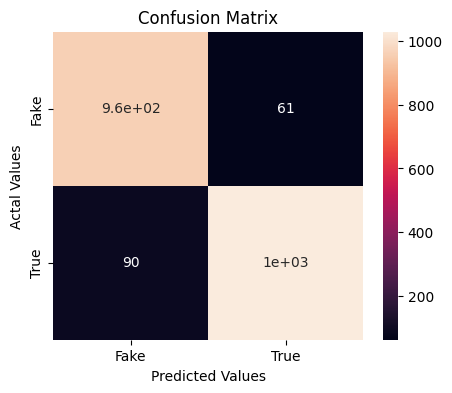

In [58]:
conf_matrix(y_test,pred_svm)

In [59]:
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      1020
         1.0       0.93      0.91      0.92      1120

    accuracy                           0.92      2140
   macro avg       0.92      0.92      0.92      2140
weighted avg       0.92      0.92      0.92      2140



In [60]:
# conf_matrix(y_test,pred_LR)

## For direct input from user

In [61]:
inp = input("Enter the news to be verified: ")

Enter the news to be verified: abnfuoab


In [65]:
inp = text_process(inp)
inp = listToString(inp)

In [66]:
X_input = pipeline.transform([inp])

In [67]:
pred_svm_inp = model_MNB.predict(X_input)
pred_svm_inp

array([1])